In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
pd.plotting.register_matplotlib_converters()
%matplotlib inline
warnings.filterwarnings('ignore')

In [36]:
fifa = pd.read_csv('C:/Users/JoshuaMeldrum/Documents/Ironhack/FIFA_2021_PROJECT/FIFA_2021.csv')
pd.set_option('display.max_columns', 150)
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,256612,Evanilson,20,73,Brazil,FC Porto,75,ST,ST,https://cdn.sofifa.com/players/256/612/20_120.png,https://cdn.sofifa.com/teams/236/light_60.png,https://cdn.sofifa.com/flags/br.png,87,FC Porto 2020 ~ 2025,"6'4""",192lbs,Right,14,11-Sep-20,NaN,€9M,€9K,€23.6M,2020 ~ 2025,327,32,79,75,72,69.0,286,72,67.0,40,36,71,329,73,71,63.0,60,62.0,341,75,64.0,68,63,71,252,29,16.0,79.0,59.0,69,67.0,61,22,20,19.0,51,13,11,6,14,7,1647,355,4 ★,2★,Medium,Low,1 ★,72,76,54,70,25,58,738,73+2,73+2,73+2,68+0,72+0,72+0,72+0,68+0,69+2,69+2,69+2,65+2,59+2,59+2,59+2,65+2,46+2,43+2,43+2,43+2,46+2,43+2,39+2,39+2,39+2,43+2,16+2,Male
1,236245,A. Elis,24,75,Honduras,Boavista FC,76,ST,RM RW ST,https://cdn.sofifa.com/players/236/245/20_120.png,https://cdn.sofifa.com/teams/1898/light_60.png,https://cdn.sofifa.com/flags/hn.png,81,Boavista FC 2020 ~ 2023,"5'11""",170lbs,Right,6,21-Sep-20,NaN,€9M,€9K,€20.7M,2020 ~ 2023,331,58,73,69,65,66.0,330,79,59.0,57,58,77,396,91,89,79.0,74,63.0,363,72,80.0,74,72,65,312,68,33.0,73.0,73.0,65,69.0,73,27,21,25.0,41,9,7,6,10,9,1846,402,4 ★,4★,High,Medium,1 ★,90,70,63,77,30,72,112,74+2,74+2,74+2,75+0,75+0,75+0,75+0,75+0,74+2,74+2,74+2,74+2,66+2,66+2,66+2,74+2,55+2,52+2,52+2,52+2,55+2,52+2,47+2,47+2,47+2,52+2,16+2,Male
2,239367,R. Hack,21,74,Germany,1. FC Nürnberg,75,RM,LM CAM,https://cdn.sofifa.com/players/239/367/20_120.png,https://cdn.sofifa.com/teams/171/light_60.png,https://cdn.sofifa.com/flags/de.png,84,1. FC Nürnberg 2019 ~ 2023,"5'9""",150lbs,Right,10,1-Jul-19,NaN,€9M,€9K,€16.2M,2019 ~ 2023,326,67,73,49,70,67.0,307,78,56.0,49,48,76,408,85,84,87.0,66,86.0,276,70,39.0,80,45,42,260,38,29.0,73.0,66.0,54,65.0,93,33,31,29.0,45,8,9,9,10,9,1715,376,4 ★,4★,Medium,Medium,1 ★,84,65,64,78,33,52,360,69+2,69+2,69+2,73+0,72+0,72+0,72+0,73+0,71+2,71+2,71+2,73+2,63+2,63+2,63+2,73+2,57+2,50+2,50+2,50+2,57+2,54+2,41+2,41+2,41+2,54+2,15+2,Male
3,216451,J. Seri,28,77,Ivory Coast,Fulham,77,CM,CM CDM,https://cdn.sofifa.com/players/216/451/20_120.png,https://cdn.sofifa.com/teams/144/light_60.png,https://cdn.sofifa.com/flags/ci.png,77,Fulham 2018 ~ 2022,"5'7""",161lbs,Right,0,12-Jul-18,NaN,€9M,€91K,€17.1M,2018 ~ 2022,327,72,65,60,83,47.0,399,75,80.0,81,81,82,372,75,59,85.0,73,80.0,343,74,64.0,74,59,72,352,68,69.0,70.0,78.0,67,81.0,208,69,71,68.0,58,14,13,9,10,12,2059,425,4 ★,3★,Medium,Medium,2 ★,66,68,79,78,69,65,58,70+2,70+2,70+2,74+0,74+0,74+0,74+0,74+0,76+1,76+1,76+1,75+2,77+0,77+0,77+0,75+2,73+2,74+2,74+2,74+2,73+2,71+2,68+2,68+2,68+2,71+2,19+2,Male
4,180216,S. Coleman,31,79,Republic of Ireland,Everton,79,RB,RB,https://cdn.sofifa.com/players/180/216/20_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/ie.png,79,Everton 2009 ~ 2022,"5'10""",170lbs,Right,0,4-Feb-09,NaN,€9M,€76K,€17.1M,2009 ~ 2022,348,77,61,69,77,64.0,340,77,65.0,53,69,76,366,72,69,73.0,78,74.0,349,75,71.0,72,65,66,354,80,79.0,70.0,70.0,55,82.0,240,78,82,80.0,50,5,15,10,13,7,2047,433,3 ★,3★,High,High,2 ★,70,65,73,76,79,70,157,70+2,70+2,70+2,73+0,72+0,72+0,72+0,73+0,73+2,73+2,73+2,73+2,74+2,74+2,74+2,73+2,77+2,76+2,76+2,76+2,77+2,77+2,76+2,76+2,76+2,77+2,17+2,Male


In [16]:
pd.set_option('display.max_rows', 1000)
fifa.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

In [29]:
fifa.isnull().sum()

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

In [125]:
#Drop unneccessary columns

clean_fifa = fifa.drop(['Player Photo','Club Logo', 'Flag Photo', 'Gender', 'Loan Date End'], axis = 1)
clean_fifa.head()



,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,256612,Evanilson,20,73,Brazil,FC Porto,75,ST,ST,87,FC Porto 2020 ~ 2025,"6'4""",192lbs,Right,14,11-Sep-20,€9M,€9K,€23.6M,2020 ~ 2025,327,32,79,75,72,69.0,286,72,67.0,40,36,71,329,73,71,63.0,60,62.0,341,75,64.0,68,63,71,252,29,16.0,79.0,59.0,69,67.0,61,22,20,19.0,51,13,11,6,14,7,1647,355,4 ★,2★,Medium,Low,1 ★,72,76,54,70,25,58,738,73+2,73+2,73+2,68+0,72+0,72+0,72+0,68+0,69+2,69+2,69+2,65+2,59+2,59+2,59+2,65+2,46+2,43+2,43+2,43+2,46+2,43+2,39+2,39+2,39+2,43+2,16+2
1,236245,A. Elis,24,75,Honduras,Boavista FC,76,ST,RM RW ST,81,Boavista FC 2020 ~ 2023,"5'11""",170lbs,Right,6,21-Sep-20,€9M,€9K,€20.7M,2020 ~ 2023,331,58,73,69,65,66.0,330,79,59.0,57,58,77,396,91,89,79.0,74,63.0,363,72,80.0,74,72,65,312,68,33.0,73.0,73.0,65,69.0,73,27,21,25.0,41,9,7,6,10,9,1846,402,4 ★,4★,High,Medium,1 ★,90,70,63,77,30,72,112,74+2,74+2,74+2,75+0,75+0,75+0,75+0,75+0,74+2,74+2,74+2,74+2,66+2,66+2,66+2,74+2,55+2,52+2,52+2,52+2,55+2,52+2,47+2,47+2,47+2,52+2,16+2
2,239367,R. Hack,21,74,Germany,1. FC Nürnberg,75,RM,LM CAM,84,1. FC Nürnberg 2019 ~ 2023,"5'9""",150lbs,Right,10,1-Jul-19,€9M,€9K,€16.2M,2019 ~ 2023,326,67,73,49,70,67.0,307,78,56.0,49,48,76,408,85,84,87.0,66,86.0,276,70,39.0,80,45,42,260,38,29.0,73.0,66.0,54,65.0,93,33,31,29.0,45,8,9,9,10,9,1715,376,4 ★,4★,Medium,Medium,1 ★,84,65,64,78,33,52,360,69+2,69+2,69+2,73+0,72+0,72+0,72+0,73+0,71+2,71+2,71+2,73+2,63+2,63+2,63+2,73+2,57+2,50+2,50+2,50+2,57+2,54+2,41+2,41+2,41+2,54+2,15+2
3,216451,J. Seri,28,77,Ivory Coast,Fulham,77,CM,CM CDM,77,Fulham 2018 ~ 2022,"5'7""",161lbs,Right,0,12-Jul-18,€9M,€91K,€17.1M,2018 ~ 2022,327,72,65,60,83,47.0,399,75,80.0,81,81,82,372,75,59,85.0,73,80.0,343,74,64.0,74,59,72,352,68,69.0,70.0,78.0,67,81.0,208,69,71,68.0,58,14,13,9,10,12,2059,425,4 ★,3★,Medium,Medium,2 ★,66,68,79,78,69,65,58,70+2,70+2,70+2,74+0,74+0,74+0,74+0,74+0,76+1,76+1,76+1,75+2,77+0,77+0,77+0,75+2,73+2,74+2,74+2,74+2,73+2,71+2,68+2,68+2,68+2,71+2,19+2
4,180216,S. Coleman,31,79,Republic of Ireland,Everton,79,RB,RB,79,Everton 2009 ~ 2022,"5'10""",170lbs,Right,0,4-Feb-09,€9M,€76K,€17.1M,2009 ~ 2022,348,77,61,69,77,64.0,340,77,65.0,53,69,76,366,72,69,73.0,78,74.0,349,75,71.0,72,65,66,354,80,79.0,70.0,70.0,55,82.0,240,78,82,80.0,50,5,15,10,13,7,2047,433,3 ★,3★,High,High,2 ★,70,65,73,76,79,70,157,70+2,70+2,70+2,73+0,72+0,72+0,72+0,73+0,73+2,73+2,73+2,73+2,74+2,74+2,74+2,73+2,77+2,76+2,76+2,76+2,77+2,77+2,76+2,76+2,76+2,77+2,17+2


In [118]:
#Here we use the .agg function to shows mutiple statistics for all countries 

clean_fifa.groupby('Nationality').OVA.agg(['count', 'min', 'max', 'mean'])


,count,min,max,mean
Nationality,,,,
Afghanistan,3,60,64,61.333333
Albania,42,48,83,66.809524
Algeria,51,50,85,71.549020
Andorra,1,63,63,63.000000
Angola,19,60,77,68.526316
Antigua &amp; Barbuda,7,52,71,60.857143
Argentina,778,53,93,69.668380
Armenia,8,62,80,69.500000
Aruba,1,68,68,68.000000


<AxesSubplot:xlabel='Nationality'>

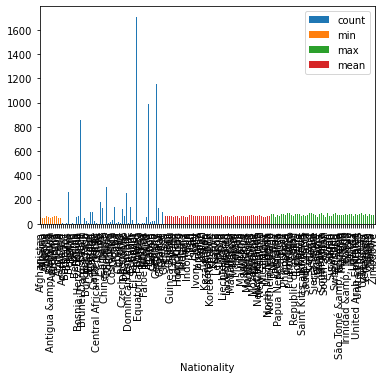

In [119]:
clean_fifa.groupby('Nationality').OVA.agg(['count', 'min', 'max', 'mean']).plot(kind = 'bar')


In [27]:
clean_fifa[clean_fifa.Nationality=='England']

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
15,230005,T. Davies,22,75,England,Everton,77,CM,CM CDM,80,Everton 2015 ~ 2023,"5'11""",154lbs,Right,5,30-Sep-15,€9M,€55K,€17.8M,2015 ~ 2023,312,66,64,61,79,42.0,352,76,64.0,61,74,77,345,66,65,71.0,74,69.0,331,70,56.0,78,65,62,345,84,67.0,69.0,76.0,49,76.0,209,68,73,68.0,56,11,12,9,14,10,1950,417,3 ★,3★,High,Medium,1 ★,65,63,73,75,69,72,160,68+2,68+2,68+2,71+0,72+0,72+0,72+0,71+0,73+2,73+2,73+2,73+2,75+2,75+2,75+2,73+2,71+2,74+2,74+2,74+2,71+2,70+2,70+2,70+2,70+2,70+2,18+2
17,194932,A. Townsend,28,77,England,Crystal Palace,77,RM,RM ST,77,Crystal Palace 2016 ~ 2021,"5'10""",161lbs,Left,0,1-Jul-16,€9M,€54K,€17.1M,2016 ~ 2021,342,77,70,48,75,72.0,384,80,80.0,78,66,80,386,78,78,78.0,75,77.0,342,83,44.0,75,61,79,337,76,37.0,73.0,75.0,76,70.0,110,41,35,34.0,59,13,11,11,11,13,1960,411,4 ★,4★,High,High,2 ★,78,75,74,79,38,67,48,72+2,72+2,72+2,77+0,76+0,76+0,76+0,77+0,76+1,76+1,76+1,76+1,71+2,71+2,71+2,76+1,61+2,59+2,59+2,59+2,61+2,57+2,50+2,50+2,50+2,57+2,19+2
29,204760,C. Taylor,26,77,England,Burnley,77,LB,LB,78,Burnley 2017 ~ 2024,"5'11""",154lbs,Left,1,6-Jul-17,€9M,€48K,€17.8M,2017 ~ 2024,315,77,49,73,73,43.0,349,76,69.0,61,69,74,350,66,73,68.0,74,69.0,349,63,76.0,77,74,59,327,79,75.0,63.0,65.0,45,71.0,228,75,77,76.0,54,13,6,14,13,8,1972,421,2 ★,3★,High,Medium,1 ★,70,54,71,74,76,76,36,66+2,66+2,66+2,69+0,68+0,68+0,68+0,69+0,69+2,69+2,69+2,71+2,71+2,71+2,71+2,71+2,75+2,74+2,74+2,74+2,75+2,75+2,75+2,75+2,75+2,75+2,17+2
41,189165,J. Shelvey,28,77,England,Newcastle United,77,CM,CM,77,Newcastle United 2016 ~ 2023,"6'0""",176lbs,Right,0,12-Jan-16,€9M,€42K,€17.1M,2016 ~ 2023,354,73,66,67,82,66.0,376,73,69.0,73,84,77,316,58,58,62.0,73,65.0,378,85,64.0,77,71,81,369,84,62.0,70.0,82.0,71,78.0,184,60,63,61.0,64,14,11,15,8,16,2041,420,3 ★,3★,Low,Low,2 ★,58,73,79,73,62,75,57,71+2,71+2,71+2,72+0,73+0,73+0,73+0,72+0,75+2,75+2,75+2,73+2,77+0,77+0,77+0,73+2,69+2,72+2,72+2,72+2,69+2,67+2,67+2,67+2,67+2,67+2,19+2
45,218659,M. Targett,24,76,England,Aston Villa,77,LWB,LB LWB,81,Aston Villa 2019 ~ 2023,"6'0""",154lbs,Left,5,1-Jul-19,€9M,€40K,€17.8M,2019 ~ 2023,294,81,40,60,73,40.0,344,69,77.0,62,62,74,350,70,74,69.0,74,63.0,307,65,61.0,78,65,38,315,63,77.0,62.0,62.0,51,65.0,218,73,74,71.0,58,10,15,8,11,14,1886,399,2 ★,3★,High,Medium,1 ★,72,46,70,70,73,68,117,61+2,61+2,61+2,67+0,65+0,65+0,65+0,67+0,65+2,65+2,65+2,69+2,68+2,68+2,68+2,69+2,75+2,72+2,72+2,72+2,75+2,74+2,70+2,70+2,70+2,74+2,19+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,53352,D. Bulman,41,60,England,Crawley Town,63,CDM,CM CDM,60,Crawley Town 2017 ~ 2021,"5'9""",165lbs,Right,0,1-Jul-17,€0,€1K,€0,2017 ~ 2021,232,45,33,52,65,37.0,274,55,44.0,48,62,65,234,33,34,38.0,59,70.0,337,60,76.0,75,72,54,277,77,63.0,49.0,50.0,38,64.0,172,60,58,54.0,67,11,16,13,16,11,1593,324,3 ★,2★,Medium,High,1 ★,34,44,56,57,59,74,8,51+2,51+2,51+2,50+0,52+0,52+0,52+0,50+0,54+2,54+2,54+2,53+2,60+0,60+0,60+0,53+2,57+2,63+-3,63+-3,63+

In [28]:
clean_fifa[clean_fifa.Nationality=='England'].OVA.max()

88

In [37]:
#England's avg. OVA
clean_fifa[clean_fifa.Nationality=='England'].OVA.mean()

63.64264792032806

In [31]:
#Best player by country's OVA
clean_fifa.groupby('Nationality').OVA.max() 

Nationality
Afghanistan                 64
Albania                     83
Algeria                     85
Andorra                     63
Angola                      77
Antigua &amp; Barbuda       71
Argentina                   93
Armenia                     80
Aruba                       68
Australia                   80
Austria                     84
Azerbaijan                  68
Barbados                    61
Belarus                     75
Belgium                     91
Belize                      63
Benin                       74
Bermuda                     72
Bolivia                     71
Bosnia Herzegovina          85
Brazil                      91
Brunei Darussalam           57
Bulgaria                    80
Burkina Faso                78
Burundi                     71
Cameroon                    84
Canada                      81
Cape Verde                  77
Central African Republic    79
Chad                        73
Chile                       83
China PR                   

(array([2.000e+00, 3.300e+01, 6.110e+02, 1.671e+03, 4.857e+03, 4.776e+03,
        3.808e+03, 1.059e+03, 2.790e+02, 2.900e+01]),
 array([38. , 43.5, 49. , 54.5, 60. , 65.5, 71. , 76.5, 82. , 87.5, 93. ]),
 <BarContainer object of 10 artists>)

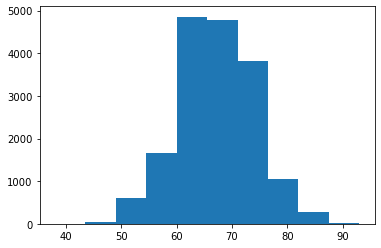

In [32]:
plt.hist(clean_fifa.OVA)

(array([2.007e+03, 5.151e+03, 4.449e+03, 2.674e+03, 2.143e+03, 6.200e+02,
        6.800e+01, 1.100e+01, 1.000e+00, 1.000e+00]),
 array([16. , 19.7, 23.4, 27.1, 30.8, 34.5, 38.2, 41.9, 45.6, 49.3, 53. ]),
 <BarContainer object of 10 artists>)

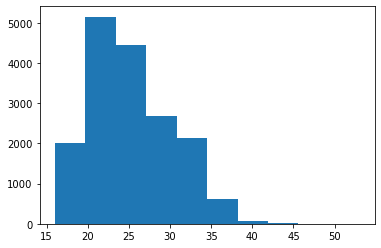

In [38]:
plt.hist(clean_fifa.Age)

In [131]:
age_sort = clean_fifa.sort_values('Age')
age_sort

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,new_weight
10533,253971,T. Dickson-Peters,16,58,Scotland,Norwich City,59,ST,ST,73,Norwich City 2019 ~ 2021,"5'11""",161lbs,Right,15,17-Oct-19,€250K,€2K,€656K,2019 ~ 2021,246,40,60,50,44,52.0,261,57,54.0,57,35,58,321,74,69,53.0,59,66.0,280,63,60.0,56,45,56,205,34,18.0,49.0,46.0,58,51.0,46,18,15,13.0,52,13,7,6,12,14,1411,296,3 ★,2★,High,Medium,1 ★,71,59,43,57,20,46,3,57+2,57+2,57+2,55+0,56+0,56+0,56+0,55+0,53+2,53+2,53+2,54+2,46+2,46+2,46+2,54+2,40+2,35+2,35+2,35+2,40+2,38+2,31+2,31+2,31+2,38+2,16+2,161
6839,253028,G. Plechero,16,61,Italy,Cittadella,61,GK,GK,79,Cittadella 2018 ~ 2022,"5'11""",163lbs,Right,18,1-Aug-18,€425K,€500,€924K,2018 ~ 2022,90,13,9,22,40,6.0,86,9,10.0,14,35,18,254,41,42,61.0,61,49.0,170,40,60.0,20,44,6,90,30,10.0,8.0,32.0,10,40.0,34,8,12,14.0,295,63,60,53,55,64,1019,337,3 ★,1★,Medium,Medium,1 ★,63,60,53,64,42,55,8,24+2,24+2,24+2,24+0,24+0,24+0,24+0,24+0,27+2,27+2,27+2,25+2,27+2,27+2,27+2,25+2,23+2,25+2,25+2,25+2,23+2,23+2,23+2,23+2,23+2,23+2,60+2,163
4987,259054,Tiago Morais,16,61,Portugal,Boavista FC,63,ST,ST,82,Boavista FC 2020 ~ 2024,"5'9""",132lbs,Right,21,1-Jul-20,€550K,€500,€1.7M,2020 ~ 2024,295,59,60,58,59,59.0,269,62,54.0,45,46,62,358,75,78,77.0,56,72.0,289,65,61.0,56,46,61,224,31,11.0,63.0,58.0,61,54.0,59,22,15,22.0,58,11,13,10,13,11,1552,325,5 ★,2★,High,Medium,1 ★,77,61,56,64,21,46,150,61+2,61+2,61+2,63+0,62+0,62+0,62+0,63+0,61+2,61+2,61+2,61+2,53+2,53+2,53+2,61+2,45+2,38+2,38+2,38+2,45+2,42+2,33+2,33+2,33+2,42+2,17+2,132
10731,243491,César Gelabert,16,57,Spain,Real Madrid,57,RM,CAM LM ST,82,Real Madrid 2015 ~ 2018,"6'0""",159lbs,Right,25,15-Jul-15,€230K,€6K,€702K,2015 ~ 2018,216,41,63,32,45,35.0,259,64,42.0,40,52,61,320,71,67,61.0,57,64.0,268,46,58.0,59,62,43,217,38,28.0,58.0,48.0,45,57.0,106,32,36,38.0,61,14,13,13,10,11,1447,318,4 ★,4★,High,Low,1 ★,69,53,45,62,33,56,3,55+1,55+1,55+1,57+0,57+0,57+0,57+0,57+0,56+1,56+1,56+1,57+1,51+1,51+1,51+1,57+1,47+1,44+1,44+1,44+1,47+1,45+1,41+1,41+1,41+1,45+1,17+1,159
8622,247429,D. Hoyo-Kowalski,16,59,Poland,Wisła Kraków,61,CB,CB,81,Wisła Kraków 2019 ~ 2021,"6'2""",165lbs,Right,22,1-Feb-19,€325K,€500,€764K,2019 ~ 2021,158,27,18,52,31,30.0,180,24,35.0,30,52,39,305,66,66,71.0,57,45.0,276,42,76.0,68,70,20,207,49,61.0,23.0,32.0,42,48.0,187,58,66,63.0,50,8,9,11,12,10,1363,288,2 ★,2★,Medium,High,1 ★,66,25,34,36,61,66,100,38+2,38+2,38+2,36+0,35+0,35+0,35+0,36+0,36+2,36+2,36+2,39+2,41+2,41+2,41+2,39+2,52+2,53+2,53+2,53+2,52+2,55+2,59+2,59+2,59+2,55+2,15+2,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,138292,P. Onstad,42,67,Canada,DC United,67,GK,NaN,70,DC United 2005 ~ 2011,"6'4""",216lbs,Right,3,1-Jan-05,€0,€0,€0,2005 ~ 2011,117,23,15,26,41,12.0,115,16,18.0,8,36,37,267,53,52,41.0,51,70.0,216,27,67.0,53,55,14,194,59,22.0,12.0,50.0,51,NaN,47,23,12,12.0,338,61,67,68,75,67,1294,390,3 ★,1★,NaN,NaN,1 ★,61,67,68,67,52,75,3,31+0,31+0,31+0,36+0,31+0,31+0,31+0,36+0,31+0,31+0,31+

In [133]:
player_prime = age_sort[['Age', 'OVA']]
player_prime

,Age,OVA
10533,16,58
6839,16,61
4987,16,61
10731,16,57
8622,16,59
...,...,...
16706,42,67
6392,43,64
16676,43,64
7911,47,48


<AxesSubplot:xlabel='Age', ylabel='OVA'>

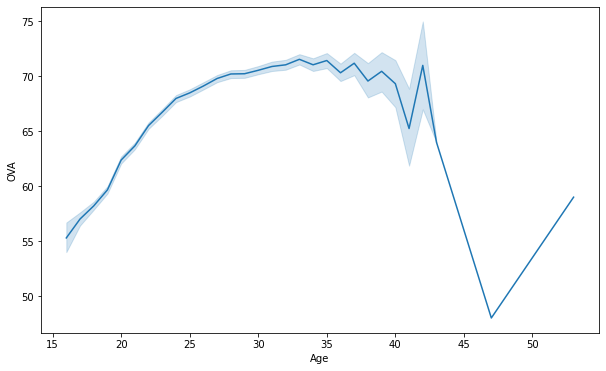

In [137]:
#should get rid of outliers, but it appears that peak perforamance is around the mid 30's for players

plt.figure(figsize=(10,6))

sns.lineplot(data=player_prime , x="Age", y="OVA")

<function matplotlib.pyplot.show(close=None, block=None)>

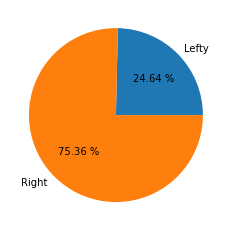

In [48]:
#Analysis of right footed players versus left footed players

lefty = clean_fifa.loc[clean_fifa['foot'] ==  'Left'].count()[0]
righty = clean_fifa.loc[clean_fifa['foot'] ==  'Right'].count()[0]

labels = ['Lefty', 'Right']

plt.title('Dominant Foot')

plt.pie([lefty, righty], labels = labels, autopct = '%.2f %%')
plt.show

In [126]:
#cleaning the weight column by dropping the 'lbs' and converting to int

import re
x = '192lbs'
re.findall('\d+', x)[0]

def new_weight(x):
    value = re.findall('\d+', x)[0]
    return value

clean_fifa['new_weight'] = list(map(new_weight, clean_fifa['Weight']))

clean_fifa['new_weight']

0        192
1        170
2        150
3        161
4        170
        ... 
17120    134
17121    134
17122    132
17123    132
17124    132
Name: new_weight, Length: 17125, dtype: object

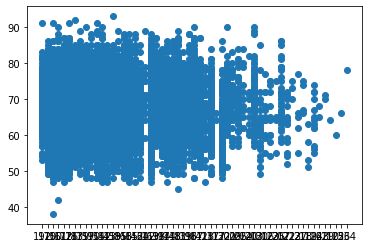

In [127]:
#not very useful

%matplotlib inline
plt.scatter(clean_fifa.new_weight, clean_fifa.OVA)

In [128]:
weight_sort = clean_fifa.sort_values('new_weight')
weight_sort = weight_sort.reset_index(drop = True)
weight_sort

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,new_weight
0,235600,B. Al Mutairi,30,64,Saudi Arabia,Al Fayha,64,LB,LB,64,Al Fayha 2019 ~ 2022,"5'6""",110lbs,Left,0,6-Jul-19,€350K,€5K,€578K,2019 ~ 2022,211,61,22,41,56,31.0,251,55,57.0,38,45,56,364,80,82,76.0,54,72.0,271,34,70.0,86,52,29,240,55,54.0,51.0,43.0,37,53.0,175,58,61,56.0,43,7,6,13,8,9,1555,337,3 ★,2★,Medium,Medium,1 ★,81,28,52,58,56,62,4,46+2,46+2,46+2,54+0,50+0,50+0,50+0,54+0,52+2,52+2,52+2,57+2,53+2,53+2,53+2,57+2,62+2,56+2,56+2,56+2,62+2,62+2,56+2,56+2,56+2,62+2,13+2,110
1,255899,K. Díaz,18,60,Venezuela,Llaneros de Guanare,61,RM,RM,72,Llaneros de Guanare 2020 ~ 2024,"5'4""",115lbs,Right,12,1-Jan-20,€350K,€500,€823K,2020 ~ 2024,245,58,55,34,55,43.0,244,58,41.0,32,55,58,306,70,75,55.0,55,51.0,230,54,45.0,60,39,32,203,26,17.0,58.0,55.0,47,48.0,75,23,23,29.0,46,8,6,11,13,8,1349,299,3 ★,2★,Medium,Medium,1 ★,73,49,54,57,24,42,4,54+2,54+2,54+2,58+0,57+0,57+0,57+0,58+0,56+2,56+2,56+2,59+2,52+2,52+2,52+2,59+2,46+2,40+2,40+2,40+2,46+2,43+2,32+2,32+2,32+2,43+2,14+2,115
2,234430,Isi Ros,24,66,Spain,AD Alcorcón,67,LM,LM ST RM,72,AD Alcorcón 2019 ~ 2021,"5'5""",117lbs,Left,6,5-Jul-19,€875K,€3K,€1.5M,2019 ~ 2021,266,65,59,38,60,44.0,315,71,63.0,60,53,68,400,85,80,89.0,51,95.0,243,50,52.0,65,25,51,228,24,26.0,60.0,61.0,57,55.0,105,42,29,34.0,48,10,14,7,7,10,1605,339,4 ★,4★,Medium,Medium,1 ★,82,55,60,72,34,36,6,57+2,57+2,57+2,66+0,63+0,63+0,63+0,66+0,64+2,64+2,64+2,65+2,57+2,57+2,57+2,65+2,53+2,45+2,45+2,45+2,53+2,50+2,37+2,37+2,37+2,50+2,15+2,117
3,246548,O. Sahraoui,19,64,Norway,Vålerenga Fotball,67,RM,LW,81,Vålerenga Fotball 2019 ~ 2023,"5'5""",117lbs,Right,17,15-May-19,€975K,€850,€1.8M,2019 ~ 2023,248,60,48,29,66,45.0,311,70,69.0,44,60,68,389,78,73,90.0,58,90.0,242,52,57.0,57,34,42,267,49,44.0,59.0,66.0,49,69.0,120,41,42,37.0,59,14,14,9,14,8,1636,342,3 ★,4★,Medium,Medium,1 ★,75,48,63,72,40,44,65,55+2,55+2,55+2,64+0,62+0,62+0,62+0,64+0,64+2,64+2,64+2,65+2,61+2,61+2,61+2,65+2,55+2,53+2,53+2,53+2,55+2,53+2,44+2,44+2,44+2,53+2,17+2,117
4,239505,P. Kun,25,63,Poland,Raków Częstochowa,64,RM,LM,66,Raków Częstochowa 2018 ~ 2021,"5'5""",119lbs,Right,3,1-Jul-18,€475K,€2K,€677K,2018 ~ 2021,246,59,41,51,61,34.0,298,62,57.0,58,58,63,381,84,81,82.0,52,82.0,285,51,82.0,77,32,43,264,70,38.0,59.0,57.0,40,52.0,135,40,44,51.0,48,7,12,6,9,14,1657,346,3 ★,2★,High,Medium,1 ★,82,44,59,65,43,53,4,54+2,54+2,54+2,61+0,59+0,59+0,59+0,61+0,60+2,60+2,60+2,62+2,57+2,57+2,57+2,62+2,57+2,53+2,53+2,53+2,57+2,56+2,49+2,49+2,49+2,56+2,15+2,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,195357,F. Farnolle,35,70,Benin,BB Erzurumspor,70,GK,GK,70,BB Erzurumspor 2020 ~ 2021,"6'5""",229lbs,Right,0,4-Sep-20,€475K,€4K,€926K,2020 ~ 2021,80,18,10,12,29,11.0,77,9,12.0,15,23,18,197,39,45,27.0,65,21.0,238,49,62.0,35,82,10,117,39,24.0,15.0,21.0,18,38.0,42,11,17,14.0,345,70,69,65,72,69,1096,387,2 ★,1★,Medium,Medium,1 ★,70,69,65,69,42,72,3,27+2,27+2,27+2,23+0,24+0,24+0,24+0,23+0,

In [129]:
weight_vs_OVA = weight_sort[['new_weight', 'OVA']]
weight_vs_OVA

,new_weight,OVA
0,110,64
1,115,60
2,117,66
3,117,64
4,119,63
...,...,...
17120,229,70
17121,234,78
17122,236,66
17123,243,68


<AxesSubplot:xlabel='new_weight', ylabel='OVA'>

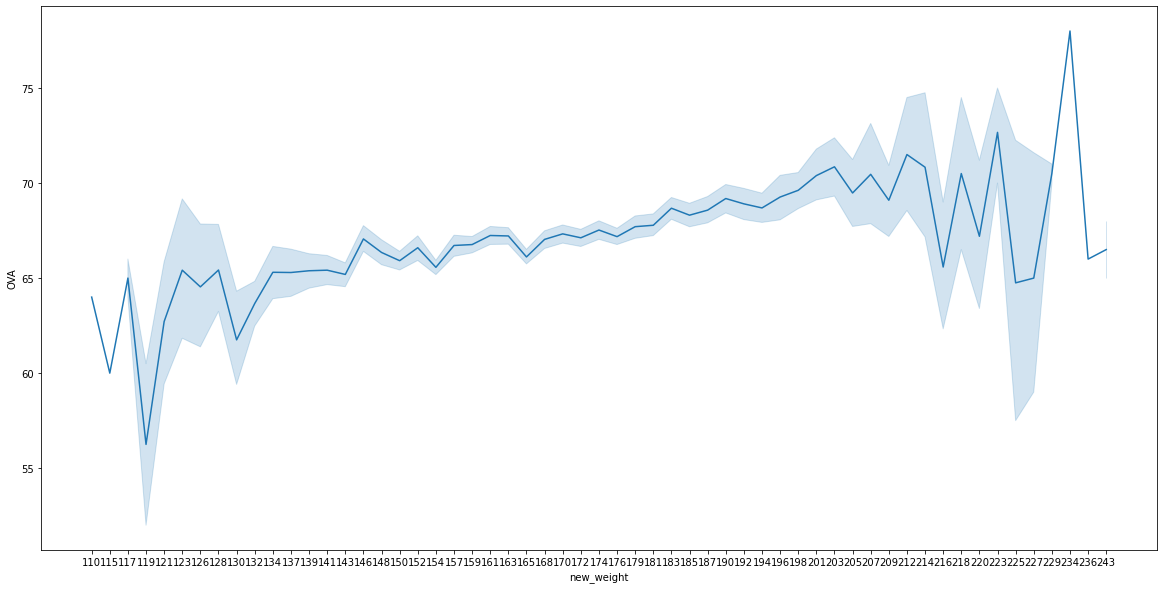

In [140]:
plt.figure(figsize=(20,10))

sns.lineplot(data=weight_vs_OVA , x="new_weight", y="OVA")